
***Summary for default of credit card clients Data Set: ***


This dataset is taken from:
https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients
It contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients. There are 25 variables in the dataset.

*   There are 30000 distinct values for ID(Clients).
*   The average value for the credit card limit is 167484.322667.
*   Average age is 35.48 years, with a standard deviation of 9.2.
*   There are no null values present in the data.
*  Data is quite imbalanced. Target variable has the ratio of 78:22.
*   There are some unexplained categories in EDUCATION and MARRIAGE columns of dataset. These categories either can be removed or merged with other categories. For this assessment purpose these undocumented categories were removed.
*   Single status people has less default payment as compared to married people. 
*   University students have less default payment as compared to graduates and high school people.
*   30% male have default payment while 47% female have default payment. But as the number of females is higher, we can calculate percentage of default payment within each sex group
*   Most number of defaults are likely been done by people from younger age groups. The higher the age the lesser chances of defaults especially applies to higher age group people
*   Grad school students have highest credit limits indicating clients with higher education gets higher credit limits. 
*   People with high credit limits have high tendency to do default payment next month
*   We have higher number of clients having 0 to 200000 balance limit. Similarly we have more number of clients in age bracket of 25-40, more clients are from young and mid-age group.

**Built the model on imbalanced data and the results are:**


Modified svm for class imbalance accuracy= 77.8
Logistic Regression accuracy = 77.8
Tried Weighted Logistic regression but it did not work.

These results can not be trusted as the data is imbalanced.

**Random sampling of minority class(Using SMOTE - Synthetic Minority Oversampling Technique.) was performed and again the models were run on this modified data**

*   With Random oversampling of data SVC, achieves the best accuracy of 96.86percent , with precision  1 and  recall score of 93.9 %. 

*   Next good model was (after oversampling)  Random forest which gives accuracy= 92.8% and recall of 96%.

Tried grid search to find the best parameters for the random forest model. But it was quite slow so could not perform this functionality properly.

The evaluation metrics used to test the model accuracy are: Accuracy,	Precision,	Recall,	F1-Score,	AUC-ROC Score.

The most important parameters in predicting default payment next month are the history of past payments(PAY_0 TO PAY_X) followed by Limit balance and PAY_AMT_X.


**Further steps:**

*   In this assessment I only did random oversampling of minority class. We can also try other techniques to improve the model performance like: Random undersampling of majority class.

*   We can do model optimization using grid search and finding the best hyperparameters and then tuning the model whith the newly found optimum hyperparameters. To reduce the colinearity effect we can use PCA, which I could not perform due to time constraint.

*   I did only few statistical tests for significance. We can do more statistical significance tests for other variables to test their impact on the target variable

In [ ]:
!pip install --upgrade xlrd

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from sklearn.model_selection import train_test_split
from sklearn import model_selection, svm
from sklearn.utils.class_weight import compute_class_weight
#from sklearn.metrics import accuracy_score,classification_report
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score,classification_report
from sklearn.utils import resample
from sklearn.metrics import confusion_matrix

matplotlib.rcParams['figure.figsize'] =(15, 7)


In [ ]:
#Read the dataset
df=pd.read_excel('/content/default of credit card clients.xls')

In [ ]:
##Check the head of the dataset
df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [ ]:
##Reset the index
df=df.rename(columns=df.iloc[0].replace('')).drop(df.index[0]).reset_index(drop=True)

In [ ]:
df=df.astype('int')

In [ ]:
##Check the head of the dataset again
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [ ]:
### Summary Statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


There are 30000 distinct values for ID(Clients).

The average value for the credit card limit is 167484.322667.

Average age is 35.48 years, with a standard deviation of 9.2

In [ ]:
##Check null values in the dataset
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [ ]:
#Check the value count in the target column
df['default payment next month'].value_counts()

0    23364
1     6636
Name: default payment next month, dtype: int64

Target Variable has imbalanced data

In [ ]:
# Check for the duplicate values for ID column
df.duplicated(subset ='ID').any()

False

No duplicate values are present in the data

In [ ]:
#Check names of the columns
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [ ]:
df.EDUCATION.unique()

array([2, 1, 3, 5, 4, 6, 0])

In [ ]:
df.PAY_6.unique()

array([-2,  2,  0, -1,  3,  6,  4,  7,  8,  5])

In [ ]:
df.PAY_2.unique()

array([ 2,  0, -1, -2,  3,  5,  7,  4,  1,  6,  8])

In [ ]:
df.MARRIAGE.unique()

array([1, 2, 3, 0])

In [ ]:
df.MARRIAGE.value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

Columns PAY_0 through Column PAY_6 (repayment status) has unexplained category(-2). 

In UCI data description there are only 4 categories description is available for education.X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). But here we can see there are other categories as well (0,5 and 6)



Again for X4: MARRIAGE there are only 3 categories mentioned in data description (1 = married; 2 = single; 3 = others). But we have 4 categories here. Category 0 which has 54 values.



## Data Preprocessing:

EDUCATION(0,5,6) and Marriage(0) has some unexplained/undocumented categories.

For Data Transformation: We can go for two approches:

1.   We can safely remove these undocumented categories from the dataset.

2.   We can merge these categories with othe categories. For ex: Category 0,5,6 in education can be merged with in others


The 0 in MARRIAGE can be categorized as 'Other' or 3.

Merging of categorical data does not seem to be a good option so we can remove these undocumented categories.

In [ ]:
# Delete category '0' 
df = df.drop(df[df['MARRIAGE']==0].index)
# we canalso merge the 0 category with 3:others
# df['MARRIAGE']=np.where(df['MARRIAGE'] == 0, 3, df['MARRIAGE'])

# categories 0, 5 and 6 are undocumented hence can be deleted or merged
df = df.drop(df[df['EDUCATION']==0].index)
df = df.drop(df[df['EDUCATION']==5].index)
df = df.drop(df[df['EDUCATION']==6].index)
# we can also merge the categories together
# df['EDUCATION']=np.where(df['EDUCATION'] == 5, 4, df['EDUCATION'])
# df['EDUCATION']=np.where(df['EDUCATION'] == 6, 4, df['EDUCATION'])
# df['EDUCATION']=np.where(df['EDUCATION'] == 0, 4, df['EDUCATION'])

In [ ]:
#We can also perform some statistical significance tests to check if there is any corelation between two variables
##Corelation between education and default payment next month'
#Null hypothesis: There is no effect of education on default payment next month'
#Alternative hypothesis: education impacts default payment next month.

from scipy.stats import chisquare
from scipy.stats import chi2_contingency
corr_edu = pd.crosstab(df['default payment next month'], df['EDUCATION'], margins=False)
stat, p, dof, expected = chi2_contingency(corr_edu)

p

1.4541546992112855e-25

So the p value is very low(<0.5) so we can reject the null hypothesis and accept the alternative hypothesis. Because education has a strong correlation with default probability.

In [ ]:
#Similarly we can check the significance for other variables as well
age_corr = pd.crosstab(df['default payment next month'], df['AGE'])
stat, p, dof, expected = chi2_contingency(age_corr )
p

5.327478822721978e-12

## Visualization

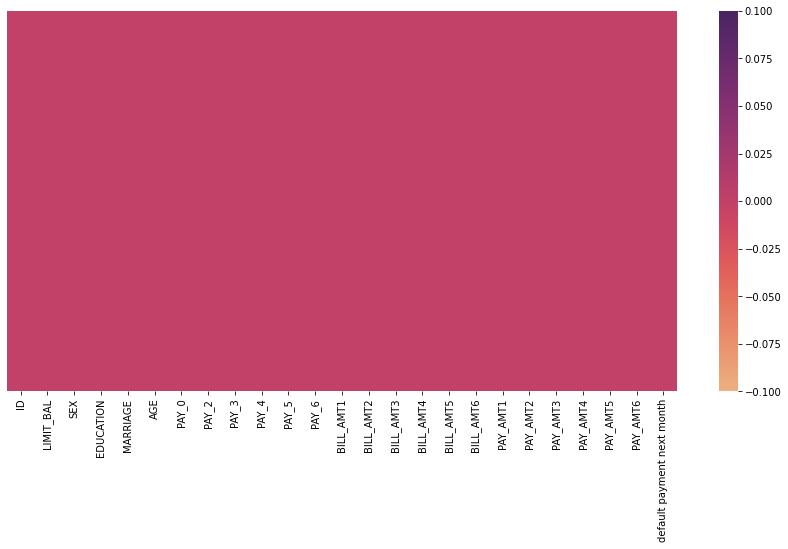

In [ ]:
#Check for null values
sns.heatmap(df.isnull(),yticklabels=False, cmap='flare')

There are no null values in the dataset so no fixing required in form of imputing values or anything

It is an imbalanced dataset, so class weights will be needed

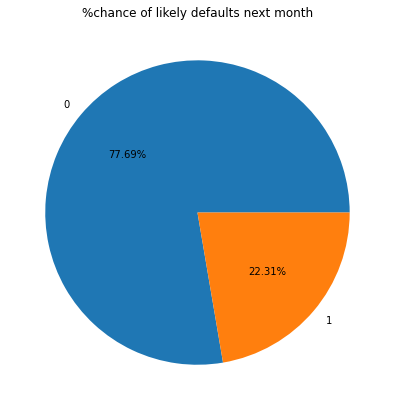

In [ ]:
plt.title('%chance of likely defaults next month')
plt.pie(df['default payment next month'].value_counts().values, labels=df['default payment next month'].value_counts().index, autopct='%.2f%%') #no of likely defaults next month
plt.show()

22% of clients will default next month.

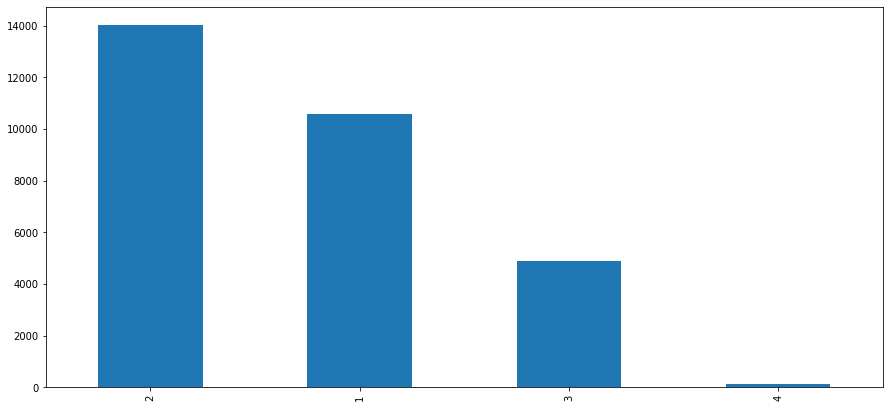

In [ ]:
df.EDUCATION.value_counts().plot(kind='bar')

##### There are More number of credit holders who are university students followed by Graduates and then High school students

 1 : Graduate school 
 2 : University 
 3 : High school 
 4 : Others


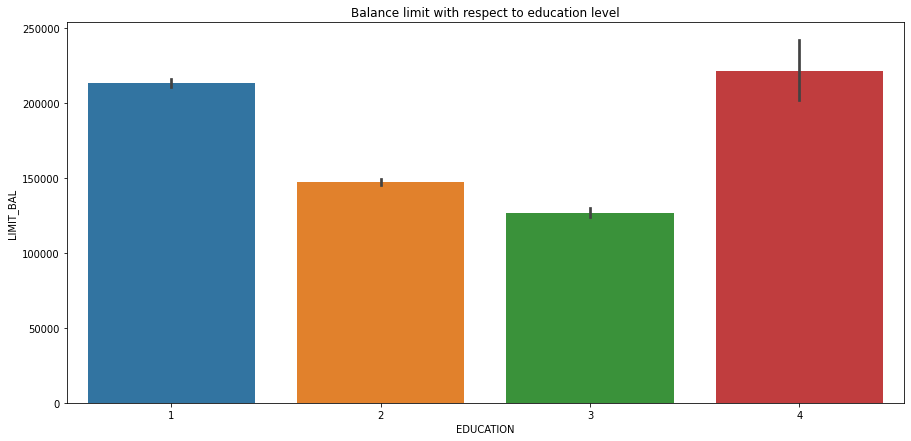

In [ ]:
fig, ax = plt.subplots()
sns.barplot(x='EDUCATION',y='LIMIT_BAL', data=df,ax=ax)
plt.title("Balance limit with respect to education level")
print(" 1 : Graduate school \n 2 : University \n 3 : High school \n 4 : Others")
plt.show()

As we can see here, higher balance limits are given to people with graduate school level education or others. Whereas people with university level education are given upto 150000 as credit limit. For high school level the limit is even lower

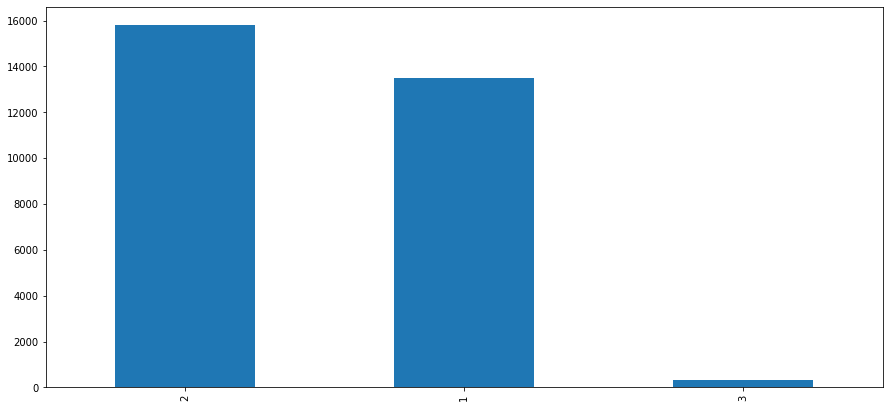

In [ ]:
df.MARRIAGE.value_counts().plot(kind='bar')

There are more single people credit card holders than married and others


In [ ]:
df.SEX.value_counts()

2    17855
1    11746
Name: SEX, dtype: int64

 1 : Male 
 2 : Female


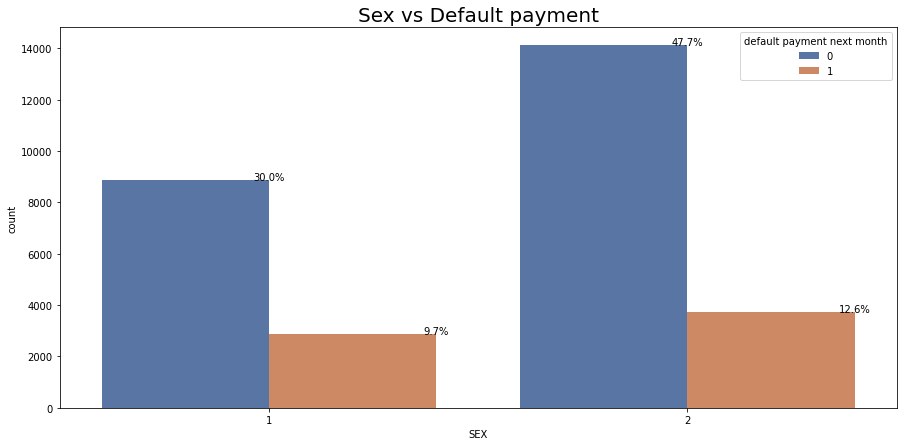

In [ ]:
##Check effect of sex on default payment next month
total = float(len(df))

ax =sns.countplot(x='SEX', data=df,hue="default payment next month", palette="deep")
plt.title('Sex vs Default payment', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
print(" 1 : Male \n 2 : Female")
plt.show()
plt.show()

30% male have default payment while 47% female have default payment. But as the number of females is higher we can calculate percentage of default payment within each sex group.

In [ ]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

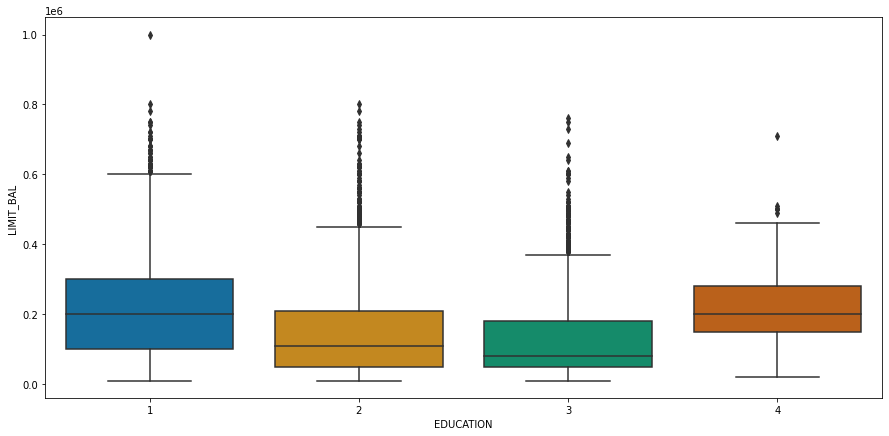

In [ ]:
## Boxplot to visualize credit limit provided based on education level
sns.boxplot(y='LIMIT_BAL', x='EDUCATION',
                 data=df, 
                 palette="colorblind",
                 )


Grad school students have highest credit limits indicating clients with higher education gets higher credit limits

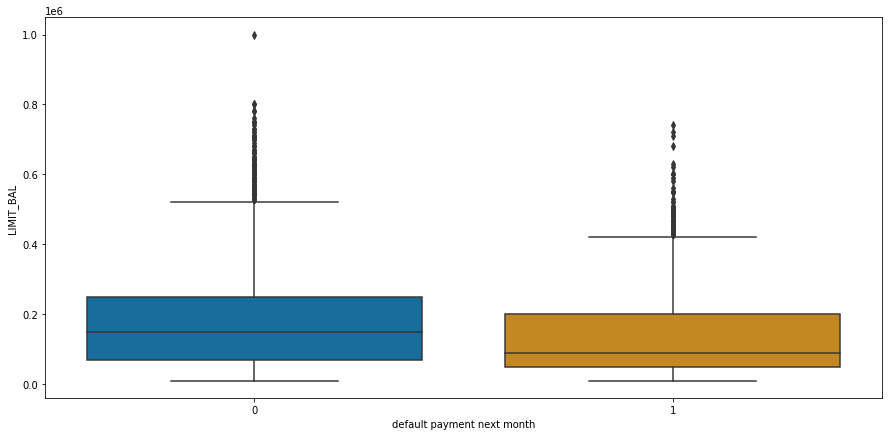

In [ ]:
## Boxplot to visualize credit limit effect on default payment next month
sns.boxplot(y='LIMIT_BAL', x='default payment next month',
                 data=df, 
                 palette="colorblind",
                 )

People with high credit limits have high tendoncy to do default payment next month

 1 : Married 
 2 : Single 
 3 : Others 


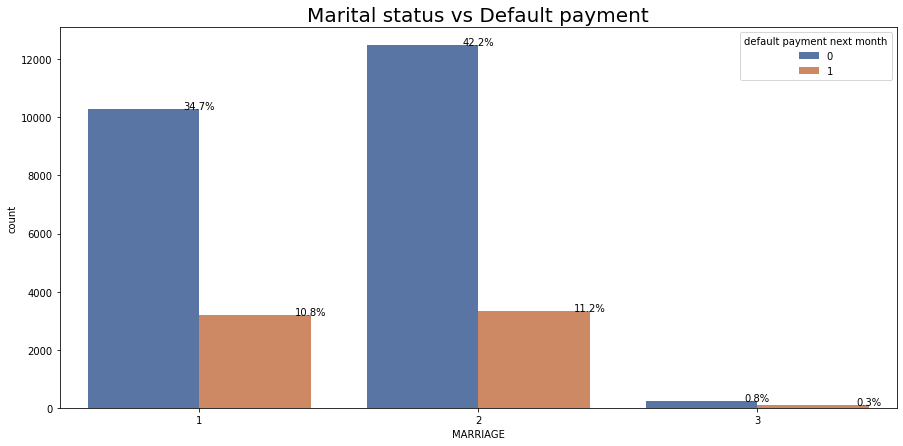

In [ ]:
total = float(len(df))
ax= sns.countplot(x="MARRIAGE", data=df,hue="default payment next month", palette="deep")
plt.title('Marital status vs Default payment', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
print(" 1 : Married \n 2 : Single \n 3 : Others ")
plt.show()

Single status people has less default payment as compared to married people

Females have overall less default payments as compared to males as this can again be due to imbalance. Female:    17855 and male: 11746

 1 : Graduate school 
 2 : University 
 3 : High school 
 4 : Others


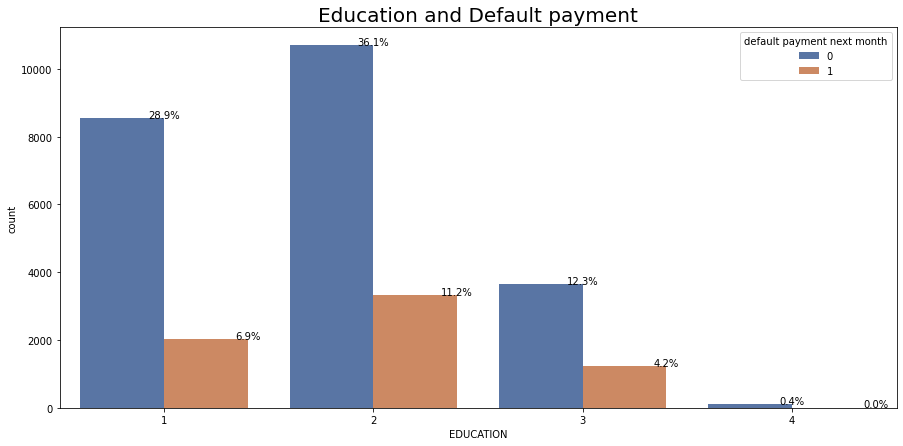

In [ ]:
total = float(len(df))
ax= sns.countplot(x="EDUCATION", data=df,hue="default payment next month", palette="deep")
plt.title('Education and Default payment', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
print(" 1 : Graduate school \n 2 : University \n 3 : High school \n 4 : Others")
plt.show()

University students have less default payment as compared to graduates and high school people but that can be attributed to the imbalance in the dataset for this column

In [ ]:
df.EDUCATION.value_counts()

2    14024
1    10581
3     4873
4      123
Name: EDUCATION, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


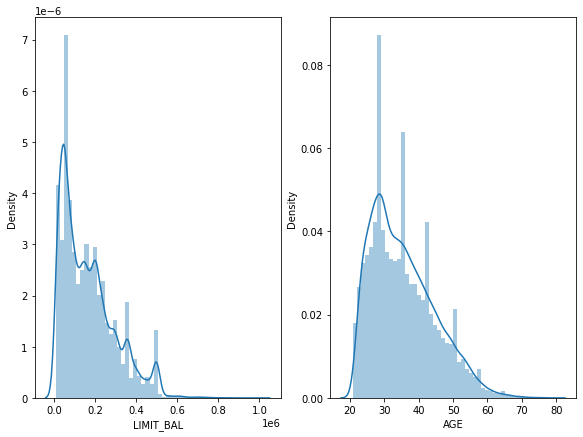

In [ ]:
plt.subplots()
plt.subplot(131)
sns.distplot(df.LIMIT_BAL)

plt.subplot(132)
sns.distplot(df.AGE)

plt.show()

As we see in this plot our data distribution shows that we have higher number of clients having 0 to 200000 balance limit. Similarly we have more number of clients in age bracket of 25-40, more clients are from young and mid-age group.

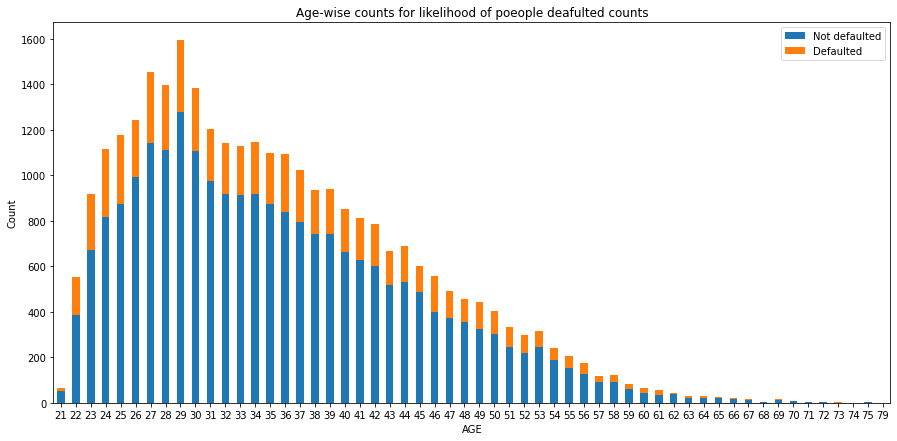

In [ ]:
age_ct = df.groupby(['AGE','default payment next month']).AGE.count().unstack()

age_ct.plot(kind='bar', stacked=True)
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.legend(['Not defaulted', 'Defaulted'])
plt.title("Age-wise counts for likelihood of poeople deafulted counts")
plt.show()

Like we see here the most number of defaults are likely been done by people from younger age groups. The higher the age the lesser chances of defaults especially applies to higher age group people.

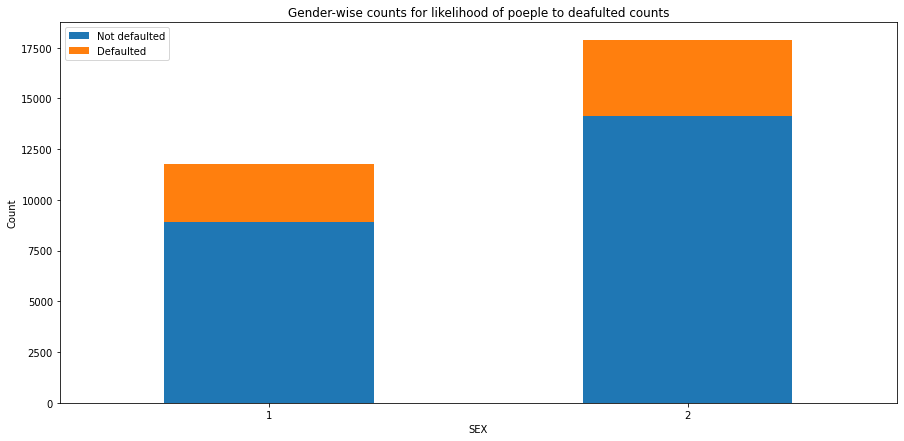

In [ ]:
sex_ct = df.groupby(['SEX','default payment next month']).SEX.count().unstack()
sex_ct.plot(kind='bar', stacked=True)
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.legend(['Not defaulted', 'Defaulted'])
plt.title("Gender-wise counts for likelihood of poeple to deafulted counts")
print(" 1 : Male \n 2 : Female ")
plt.show()

In [ ]:
sex_ct

default payment next month,0,1
SEX,,
1,8885,2861
2,14111,3744


Here the data shows more women are likely to default next month than men

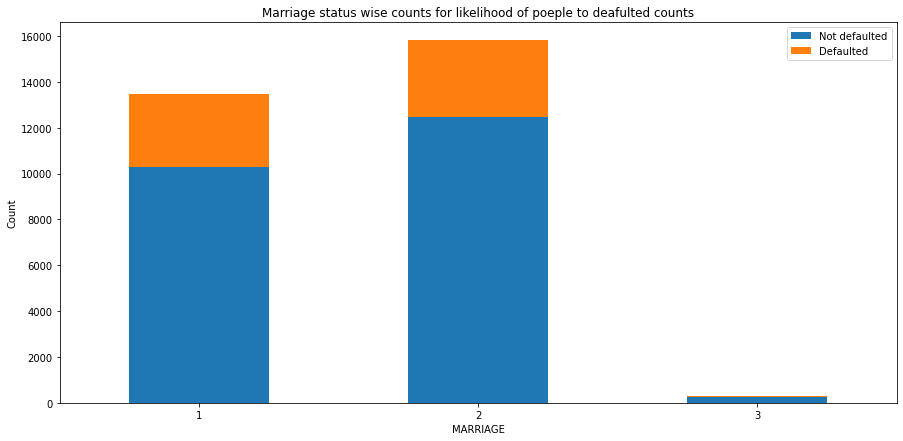

In [ ]:
marriage_ct = df.groupby(['MARRIAGE','default payment next month']).MARRIAGE.count().unstack()

marriage_ct.plot(kind='bar', stacked=True)
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.legend(['Not defaulted', 'Defaulted'])
plt.title("Marriage status wise counts for likelihood of poeple to deafulted counts")
plt.show()

In [ ]:
marriage_ct

default payment next month,0,1
MARRIAGE,,
1,10285,3192
2,12477,3329
3,234,84


It seems more married people are likely to default than unmarried people. Whereas Others too have higher chances of default

In [ ]:
df[['BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,29601.000000,29601.000000,2.960100e+04,29601.000000,29601.000000,29601.000000
mean,50957.432012,48942.189554,4.680320e+04,43122.554204,40235.545184,38858.449816
std,73370.242404,70923.985151,6.912389e+04,64196.383913,60699.344884,59519.893043
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000
25%,3528.000000,2970.000000,2.652000e+03,2329.000000,1780.000000,1278.000000
50%,22259.000000,21050.000000,2.003500e+04,19005.000000,18091.000000,17118.000000
75%,66623.000000,63497.000000,5.983000e+04,54271.000000,50072.000000,49121.000000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


Text(0.5, 1.0, 'Correlation plot')

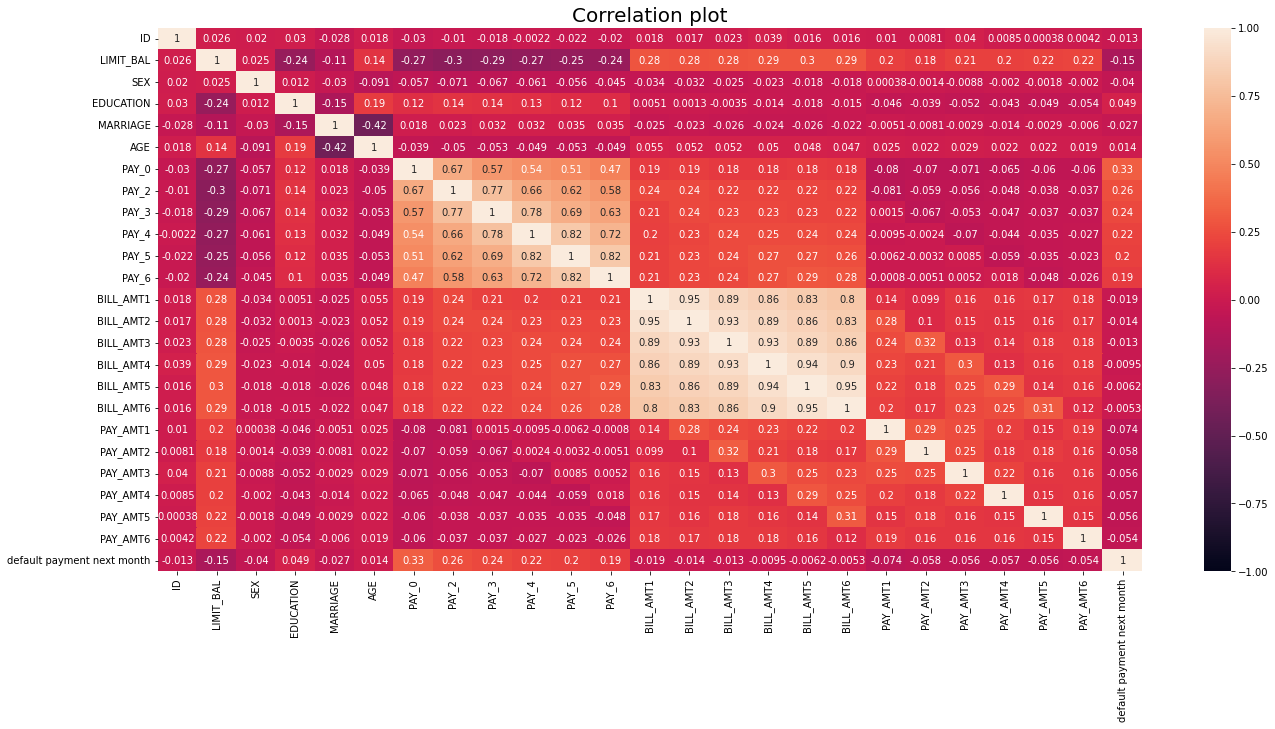

In [ ]:
f= plt.figure(figsize=(75,10))

ax=f.add_subplot(131)
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
plt.title('Correlation plot', size=20)

PAY and BILL feature variants have collinearity amongst themselves, so can be possible to exclude some of them from modelling



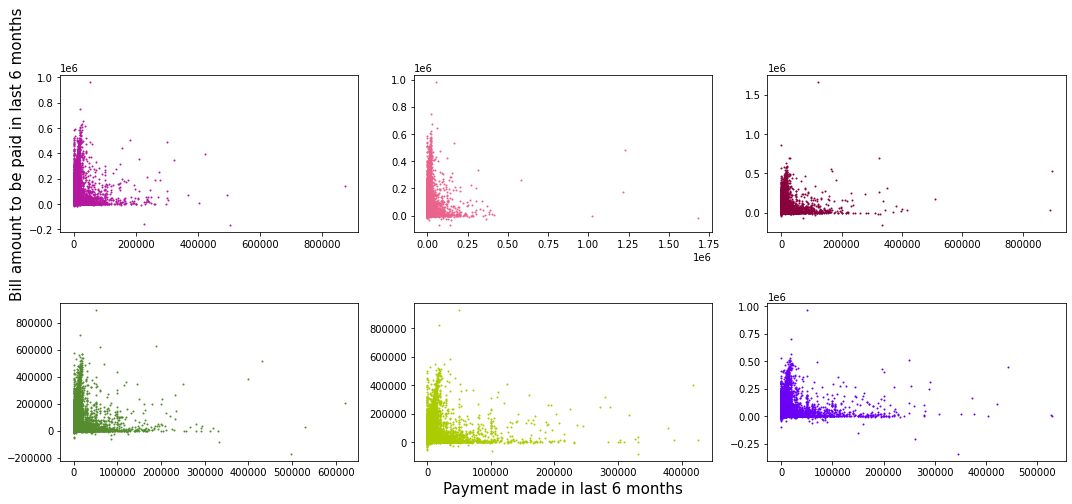

In [ ]:
plt.subplots()

plt.subplot(231)
plt.scatter(x=df.PAY_AMT1, y=df.BILL_AMT1, c='#b5179e', s=1)
plt.ylabel("Bill amount to be paid in last 6 months", fontsize=15)


plt.subplot(232)
plt.scatter(x=df.PAY_AMT2, y=df.BILL_AMT2, c='#ea638c', s=1)

plt.subplot(233)
plt.scatter(x=df.PAY_AMT3, y=df.BILL_AMT3, c='#89023e', s=1)

plt.subplot(234)
plt.scatter(x=df.PAY_AMT4, y=df.BILL_AMT4, c='#548c2f', s=1)

plt.subplot(235)
plt.scatter(x=df.PAY_AMT5, y=df.BILL_AMT5, c='#aacc00', s=1)
plt.xlabel("Payment made in last 6 months", fontsize=15)

plt.subplot(236)
plt.scatter(x=df.PAY_AMT6, y=df.BILL_AMT6, c='#6a00f4', s=1)

plt.tight_layout()
plt.show()

As we see here amongst the plotted data points, more amount of bill is pending to be paid as compared to the payment made in last 6 months, as more points are near 0. It shows that there are more number of clients with higher bill amount left to be paid.

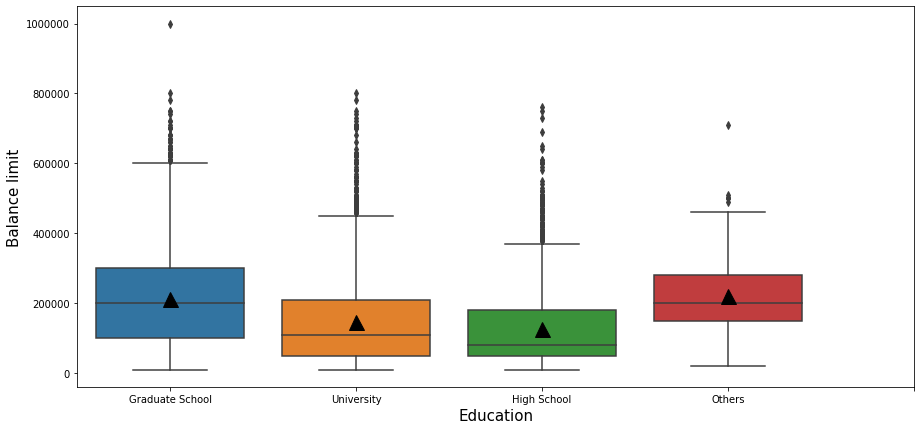

In [ ]:
sns.boxplot(x = "EDUCATION", y = "LIMIT_BAL", data = df, showmeans=True, 
            meanprops={"markerfacecolor":"black",  "markeredgecolor":"black", "markersize":"15"})
plt.xlabel("Education", fontsize= 15)
plt.ylabel("Balance limit", fontsize= 15)
plt.ticklabel_format(style='plain', axis='y') 
plt.xticks([0,1,2,3,4],['Graduate School','University','High School','Others'], fontsize = 10)

plt.show()

As we see here we have some extreme outliers with the balance limit allotted to clients with graduate school level education.These can be discarded as outliers by suitable outlier removal methods. Also most limit distribution lies around 300000 to 0 as seen as per the boxes. The mean for all education levels lies near 200000 limit.

In [ ]:
ed=df.groupby('EDUCATION')

In [ ]:
ed.first()

,ID,LIMIT_BAL,SEX,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
EDUCATION,,,,,,,,,,,,,,,,,,,,,
1,6,50000,1,2,37,0,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
2,1,20000,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
3,9,140000,2,1,28,0,0,2,0,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
4,359,110000,2,2,24,0,0,0,0,0,...,80631,82333,84462,3000,2900,2900,3000,3500,4000,0


### Building Model on Imbalanced data

In [ ]:
X = df.drop(columns=['default payment next month'])
Y = df['default payment next month'].copy()

# Test - train split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

#### Modified SVM to counter for class imbalance: SVM or Support Vector Machine is a linear model for classification and regression problems. SVM tries to make a decision boundary in such a way that the separation between the two classes(that street) is as wide as possible. This modification of SVM that weighs the margin proportional to the class importance is often referred to as weighted SVM, or cost-sensitive SVM. This algorithmis is used as we have imbalanced data.

In [ ]:
df['default payment next month'].value_counts()

0    22996
1     6605
Name: default payment next month, dtype: int64

In [ ]:
class_weights = compute_class_weight('balanced', classes=np.unique(Y), y=Y)

In [ ]:
###################################################################################
#   Classify Given Input Samples (Modified svm for class imbalance)
###################################################################################

SVM = svm.SVC(C=1.0, kernel='rbf', degree=3, gamma='auto',class_weight='balanced') 

# fit model on training set
SVM.fit(X_train,y_train)
# predict the labels on test set
svm_predictions = SVM.predict(X_test)
# get accuracy
print("SVM Accuracy Score -> ",accuracy_score(svm_predictions, y_test)*100)

SVM Accuracy Score ->  77.99797320121607


In [ ]:
print(classification_report(y_test, svm_predictions))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88      6928
           1       0.00      0.00      0.00      1953

    accuracy                           0.78      8881
   macro avg       0.39      0.50      0.44      8881
weighted avg       0.61      0.78      0.68      8881



Logistic Regression: It is a method for classification where we model a dependent variable(Y) in terms of one or more independent variables(X). This algorithm is used for the dependent variable that is Categorical. Y is modeled using a function that gives output between 0 and 1 for all values of X.

In [ ]:
## Default Logistic regression
logmodel = LogisticRegression(random_state=1)
logmodel.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(random_state=1)

In [ ]:
y_pred = logmodel.predict(X_test)

In [ ]:
import warnings
warnings.filterwarnings("ignore")
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results = pd.DataFrame([['Logistic Regression', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.780092,0.0,0.0,0.0,0.5


In [ ]:
# check the distribution
df['default payment next month'].value_counts()/df.shape[0]


0    0.776866
1    0.223134
Name: default payment next month, dtype: float64

In [ ]:
##Weighted Logistic regression
# define class weights
# Test - train split
X = df.drop(columns=['default payment next month'])
Y = df['default payment next month'].copy()
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)
w = {0:1, 1:78}
# define model
lg2 = LogisticRegression(random_state=20, class_weight=w)
# fit it
lg2.fit(X_train,y_train)
# test
y_pred = lg2.predict(X_test)
roc_wlog=roc_auc_score(y_test, y_pred)
acc_wlog = accuracy_score(y_test, y_pred)
prec_wlog = precision_score(y_test, y_pred)
rec_wlog = recall_score(y_test, y_pred)
f1_wlog = f1_score(y_test, y_pred)

results_wlog = pd.DataFrame([['Weighted Logistic Regression', acc_wlog,prec_wlog,rec_wlog, f1_wlog,roc_wlog]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results_wlog

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Weighted Logistic Regression,0.226213,0.225017,0.999499,0.367336,0.500766


Since we have very imbalanced dataset so it does not make sense to build model on imbalanced dataset. Tried only two models(SVM and Logistic so that I can compare the results for both weighted and default models of Logistic regression and SVC. Did not try other models as building model on imbalnced dataset is not a good idea. Though imbalanced dataset can be improved using SMOTE.

#### Random Oversampling

In [ ]:
# Separate majority and minority classes
df_major = df[df['default payment next month']==0]
df_minor = df[df['default payment next month']==1]


In [ ]:
df['default payment next month'].value_counts()
#df.rename(columns={"default payment next month": "default"}, inplace = True)

0    22996
1     6605
Name: default payment next month, dtype: int64

In [ ]:

# Upsampling of minority class
df_minority_oversampling = resample(df_minor, 
                                 replace=True,   
                                 n_samples=23000, # Take the number close to majority class to balancs
                                 random_state=400) # reproducible results

# Combine majority and minority(after upsampling)
df_oversample = pd.concat([df_major, df_minority_oversampling])
# Display new class counts
print("Data distribution after oversampling")
df_oversample['default payment next month'].value_counts()

Data distribution after oversampling


1    23000
0    22996
Name: default payment next month, dtype: int64

#### Model building after oversampling

In [ ]:
#using the new data frame - oversampled dataframe
##Perform train test split
X = df_oversample.drop(["default payment next month"], axis=1).values 
y = df_oversample["default payment next month"].values 
X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=2, test_size=0.20)

In [ ]:
###################################################################################
#   Classify Given Input Samples 
###################################################################################

SVM = svm.SVC(C=1.0, kernel='rbf', degree=3, gamma='auto') 

# fit model on training set
SVM.fit(X_train,y_train)
# predict the labels on test set
svm_predictions = SVM.predict(X_test)
# get accuracy
print("SVM Accuracy Score -> ",accuracy_score(svm_predictions, y_test)*100)

SVM Accuracy Score ->  96.96739130434783


In [ ]:
roc_svm=roc_auc_score(y_test, svm_predictions)
acc_svm = accuracy_score(y_test, svm_predictions)
prec_svm = precision_score(y_test, svm_predictions)
rec_svm = recall_score(y_test, svm_predictions)
f1_svm = f1_score(y_test, svm_predictions)

results_SVM = pd.DataFrame([['SVM', acc_svm,prec_svm,rec_svm, f1_svm,roc_svm]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results_SVM


,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,SVM,0.969674,1.0,0.939767,0.968948,0.969883


Logistic Regression: It is a method for classification where we model a dependent variable(Y) in terms of one or more independent variables(X). This algorithm is used for the dependent variable that is Categorical. Y is modeled using a function that gives output between 0 and 1 for all values of X.

In [ ]:
##Default Logistic regression model
logmodel = LogisticRegression(random_state=1)
logmodel.fit(X_train,y_train)

y_pred_log = logmodel.predict(X_test)
roc_log=roc_auc_score(y_test, y_pred_log)
acc_log = accuracy_score(y_test, y_pred_log)
prec_log = precision_score(y_test, y_pred_log)
rec_log = recall_score(y_test, y_pred_log)
f1_log = f1_score(y_test, y_pred_log)

results_log = pd.DataFrame([['Logistic Regression', acc_log,prec_log,rec_log, f1_log,roc_log]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results_log


,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.612826,0.612727,0.627807,0.620175,0.612721


###### Random Forest Classifier: Random forests are a way of averaging multiple deep decision trees, trained on different parts of the same training set, with the goal of reducing the variance. So RF is chosen as it will provide us the balance between Varience and bias.

In [ ]:
#Using RandomForest Classifier
from sklearn.ensemble import RandomForestClassifier
X = df_oversample.drop(["default payment next month"], axis=1).values 
y = df_oversample["default payment next month"].values 
X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=2, test_size=0.20)

clf = RandomForestClassifier(n_jobs=1200, 
                             random_state=9,
                             #criterion=RFC_METRIC,
                             n_estimators=11,
                             verbose=False)
clf.fit(X_train,y_train)
#prediction['RandomForest'] = clf.predict(X_test)
prediction = clf.predict(X_test)
acc_rf = accuracy_score(y_test, prediction)
#acc= accuracy_score(prediction['RandomForest'], y_test)
prec_rf = precision_score(y_test, prediction)
rec_rf = recall_score(y_test, prediction)
f1_rf = f1_score(y_test, prediction)
roc_rf=roc_auc_score(y_test, prediction)

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,prediction)

#print(confusion_matrix)  
resultsrf = pd.DataFrame([['Random Forest', acc_rf,prec_rf,rec_rf, f1_rf,roc_rf]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
resultsrf


,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Random Forest,0.928478,0.901576,0.963083,0.931315,0.928236


In [ ]:
predictors = [  'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 
                'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 
                'BILL_AMT1','BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
                'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

In [ ]:
X = df_oversample.drop(["default payment next month"], axis=1)
y = df_oversample["default payment next month"]#.values 
X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=2, test_size=0.20)


In [ ]:
##We can do grid search to find the best parameters for the model
from sklearn.model_selection import GridSearchCV
parameters = {"n_estimators":[100,200,500,1000], 'max_depth':[2,4,8,16,32,None]}
clf = RandomForestClassifier()
cv = GridSearchCV(clf,parameters,cv=5)
cv.fit(X, y.values.ravel())

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 4, 8, 16, 32, None],
                         'n_estimators': [100, 200, 500, 1000]})

In [ ]:
##Displaying the best parameters
def display(results):
  print(f'Best parameters are:{results.best_params_}')
  print("\n")
  mean_score = results.cv_results_['mean_test_score']
  std_score = results.cv_results_['std_test_score']
  params = results.cv_results_['params']
  for mean, std,params in zip(mean_score,std_score,params):
    #print(round(mean,3))
    #print(round(std,3))
    print(f'{round(mean,3)} + or -{round(std,3)} for the {params}')


In [ ]:
display(cv)

Best parameters are:{'max_depth': 2, 'n_estimators': 500}


0.54 + or -0.197 for the {'max_depth': 2, 'n_estimators': 100}
0.539 + or -0.196 for the {'max_depth': 2, 'n_estimators': 200}
0.548 + or -0.186 for the {'max_depth': 2, 'n_estimators': 500}
0.547 + or -0.189 for the {'max_depth': 2, 'n_estimators': 1000}
0.529 + or -0.172 for the {'max_depth': 4, 'n_estimators': 100}
0.528 + or -0.172 for the {'max_depth': 4, 'n_estimators': 200}
0.532 + or -0.175 for the {'max_depth': 4, 'n_estimators': 500}
0.531 + or -0.174 for the {'max_depth': 4, 'n_estimators': 1000}
0.469 + or -0.118 for the {'max_depth': 8, 'n_estimators': 100}
0.477 + or -0.131 for the {'max_depth': 8, 'n_estimators': 200}
0.465 + or -0.128 for the {'max_depth': 8, 'n_estimators': 500}
0.474 + or -0.129 for the {'max_depth': 8, 'n_estimators': 1000}
0.47 + or -0.054 for the {'max_depth': 16, 'n_estimators': 100}
0.476 + or -0.052 for the {'max_depth': 16, 'n_estimators': 200}
0.471 + or -0.053 for the {'max_depth': 1

In [ ]:
###Train model on training datast using selected parametes
clf_param = RandomForestClassifier(n_estimators =500, max_depth=2)
clf_param .fit(X_train, y_train)
feature_importance = pd.DataFrame(clf_param.feature_importances_,index=X.columns, columns =['Importance']).sort_values('Importance', ascending=False)
feature_importance

,Importance
PAY_0,0.220816
PAY_2,0.204664
PAY_3,0.129590
PAY_4,0.121032
PAY_5,0.096862
PAY_6,0.059115
LIMIT_BAL,0.047510
PAY_AMT1,0.035932
PAY_AMT2,0.026745
PAY_AMT4,0.016063
